In [105]:
import pandas as pd
import polars as pl
import numpy as np
from matplotlib import pyplot as plt
import sys
import os
import pickle
from pathlib import Path
import re

In [106]:
def read_variables_from_pickles(
    dir="./",
):
    pickle_dir = Path(dir)
    """
    with open(pickle_dir.joinpath("df_fragment.pkl"), "rb") as f:
        df_fragment = pickle.load(f)
    with open(pickle_dir.joinpath("df_psms_basic.pkl"), "rb") as f:
        df_psms = pickle.load(f)
    with open(pickle_dir.joinpath("df_fragment_max_basic.pkl"), "rb") as f:
        df_fragment_max = pickle.load(f)
    with open(pickle_dir.joinpath("df_fragment_max_peptide_basic.pkl"), "rb") as f:
        df_fragment_max_peptide = pickle.load(f)
    with open(pickle_dir.joinpath("config_basic.pkl"), "rb") as f:
        config = pickle.load(f)
    with open(pickle_dir.joinpath("dlc_transfer_learn_basic.pkl"), "rb") as f:
        dlc_transfer_learn = pickle.load(f)
    with open(pickle_dir.joinpath("flags_basic.pkl"), "rb") as f:
        flags = pickle.load(f)
    """

    with open(pickle_dir.joinpath("df_fragment.pkl"), "rb") as f:
        df_fragment = pickle.load(f)
    with open(pickle_dir.joinpath("df_psms.pkl"), "rb") as f:
        df_psms = pickle.load(f)
    with open(pickle_dir.joinpath("df_fragment_max.pkl"), "rb") as f:
        df_fragment_max = pickle.load(f)
    with open(pickle_dir.joinpath("df_fragment_max_peptide.pkl"), "rb") as f:
        df_fragment_max_peptide = pickle.load(f)
    with open(pickle_dir.joinpath("config.pkl"), "rb") as f:
        config = pickle.load(f)
    with open(pickle_dir.joinpath("dlc_transfer_learn.pkl"), "rb") as f:
        dlc_transfer_learn = pickle.load(f)
    with open(pickle_dir.joinpath("flags.pkl"), "rb") as f:
        flags = pickle.load(f)

    return (
        df_fragment,
        df_psms,
        df_fragment_max,
        df_fragment_max_peptide,
        config,
        dlc_transfer_learn,
        flags,
    )

In [107]:
(
    df_fragment,
    df_psms,
    df_fragment_max,
    df_fragment_max_peptide,
    config,
    dlc_transfer_learn,
    flags,
) = read_variables_from_pickles(dir="/home/robbin/MuMDIA_gh/MuMDIA/results/")

In [108]:
# Apply the function to the 'peptide' column using pl.col
df_fragment_max_peptide = df_fragment_max_peptide.with_columns(
    pl.col("peptide").str.replace_all(r"\[.*?\]", "").alias("cleaned_peptide")
)

In [109]:
df_fragment_max_peptide["cleaned_peptide"]

cleaned_peptide
str
"""HVVSSQSVGAENALQQSSLK"""
"""ETLAAAIVMR"""
"""LSRQEDLSDARAVSSVTLLCVGAALR"""
"""MNRIYQAVVLGKDAFR"""
"""LQSDQVLETANRLR"""
…
"""GASFPVAK"""
"""NEIGSVTSIQALQSTLENNEMPNTPDQK"""
"""QADLMVVAGTCFTKMAPVIQR"""


In [110]:
import polars as pl

# Read the CSV file
df = pl.from_pandas(pd.read_csv("report.tsv", sep="\t"))
# df = pl.read_csv("report.tsv", separator="\t")

In [111]:
print(len(set(df_fragment_max_peptide["cleaned_peptide"]).intersection(set(df["Stripped.Sequence"]))))
print(len(set(df_fragment_max_peptide["cleaned_peptide"]).difference(set(df["Stripped.Sequence"]))))
print(len(set(df["Stripped.Sequence"]).intersection(set(df_fragment_max_peptide["cleaned_peptide"]))))
print(len(set(df["Stripped.Sequence"]).difference(set(df_fragment_max_peptide["cleaned_peptide"]))))

10663
307205
10663
1176


In [112]:
output_missing = open("missing_peptides.fasta","w")
for idx,s in enumerate(set(df["Stripped.Sequence"]).difference(set(df_fragment_max_peptide["cleaned_peptide"]))):
    output_missing.write(">seq_" + str(idx) + "\n")
    output_missing.write(s + "\n")
output_missing.close()

In [100]:
%matplotlib inline

In [101]:
diff_seq = set(df["Stripped.Sequence"]).difference(
        set(df_fragment_max_peptide["cleaned_peptide"])
    )

In [102]:
len(diff_seq)

1193

In [103]:
diff_df = df.filter(df["Stripped.Sequence"].is_in(diff_seq))

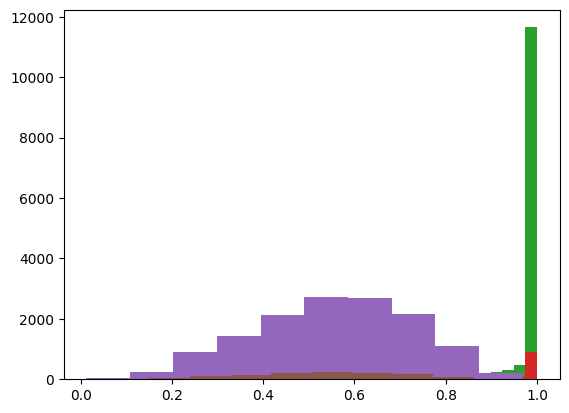

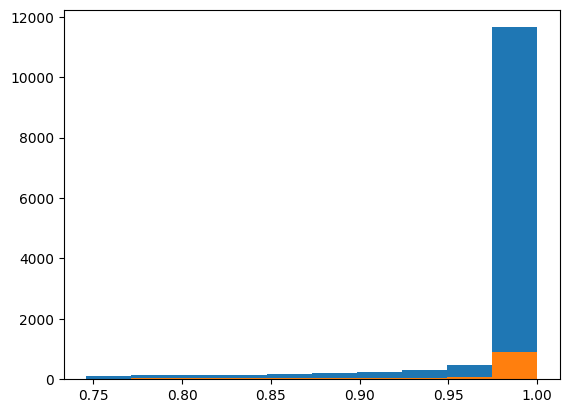

In [104]:
plt.hist(df["Spectrum.Similarity"])
plt.hist(df.filter(df["Stripped.Sequence"].is_in(diff_seq))["Spectrum.Similarity"])
plt.show()

plt.hist(df["CScore"])
plt.hist(df.filter(df["Stripped.Sequence"].is_in(diff_seq))["CScore"])
plt.show()

In [115]:
list(diff_df.columns)

['File.Name',
 'Run',
 'Protein.Group',
 'Protein.Ids',
 'Protein.Names',
 'Genes',
 'PG.Quantity',
 'PG.Normalised',
 'PG.MaxLFQ',
 'Genes.Quantity',
 'Genes.Normalised',
 'Genes.MaxLFQ',
 'Genes.MaxLFQ.Unique',
 'Modified.Sequence',
 'Stripped.Sequence',
 'Precursor.Id',
 'Precursor.Charge',
 'Q.Value',
 'PEP',
 'Global.Q.Value',
 'Protein.Q.Value',
 'PG.Q.Value',
 'Global.PG.Q.Value',
 'GG.Q.Value',
 'Translated.Q.Value',
 'Proteotypic',
 'Precursor.Quantity',
 'Precursor.Normalised',
 'Quantity.Quality',
 'RT',
 'RT.Start',
 'RT.Stop',
 'iRT',
 'Predicted.RT',
 'Predicted.iRT',
 'First.Protein.Description',
 'Lib.Q.Value',
 'Lib.PG.Q.Value',
 'Ms1.Profile.Corr',
 'Ms1.Area',
 'Ms1.Normalised',
 'Normalisation.Factor',
 'Evidence',
 'Spectrum.Similarity',
 'Averagine',
 'Mass.Evidence',
 'CScore',
 'Fragment.Quant.Raw',
 'Fragment.Correlations',
 'MS2.Scan',
 'PTM.Informative',
 'PTM.Specific',
 'PTM.Localising',
 'PTM.Q.Value',
 'PTM.Site.Confidence',
 'Lib.PTM.Site.Confidence',
 '

In [116]:
for i in range(0,100):
    print(
        diff_df.select("Modified.Sequence").row(i),
        diff_df.select("Precursor.Charge").row(i),
        diff_df.select("Fragment.Correlations").row(i),
    )

('AAAAPVTGPLADDPIQETITFDDFAK',) (3,) ('0.842267;0.691349;0.40802;0.302832;0.347235;0.323205;0.855662;0.663518;0;0.081286;0;0.0902259;',)
('AAAAVLAK',) (1,) ('0.271399;0.918396;0.415558;0.80179;0;0;0.135767;0;0;0;-0;0;',)
('AAAEADDIFGELSSGK',) (2,) ('0.507947;0.0899253;0.00077241;-0;0;0.237041;0.211099;0;0;0;-0.0853035;0;',)
('AAAIAYAR',) (2,) ('0.743692;0.324719;0.658355;0.723658;0.167491;0;0;0.158944;0;0;0;0;',)
('AAAIC(UniMod:4)AER',) (2,) ('0.877483;0.767523;0.867239;0.749858;0;0;0;0;0;0;0;0;',)
('AAASHLVR',) (2,) ('0.944545;0.955537;0.846948;0.880081;0.903152;0.989625;0.815246;0.911136;0.437348;0.221568;0;0;',)
('AAATGEALSLVC(UniMod:4)VDEHK',) (3,) ('0.654654;0.767579;0.403957;0.732532;0;0;0;0;0.0545545;-0.189682;-0.14166;0;',)
('AAC(UniMod:4)NAFTDAVLEIAR',) (2,) ('0.818727;0.802413;0.123326;0;0;0;0;-0.0258691;0;0;0;0;',)
('AADAHGIPFTLSTVSVC(UniMod:4)PIEEVAPAIK',) (3,) ('0.00602342;0.323183;-0.11721;0.409808;0.434293;0;0;0;0;0;0;0;',)
('AADNKSLGQFNLDGINPAPR',) (3,) ('0.903922;0.862

In [117]:
for i in range(0,100):
    print(df.select("Fragment.Correlations").row(i))

('0.959017;0.900071;0.725339;0.901158;0.841615;0.932578;0.338296;0.0268302;0.187774;0;0;0;',)
('0.842267;0.691349;0.40802;0.302832;0.347235;0.323205;0.855662;0.663518;0;0.081286;0;0.0902259;',)
('0.271399;0.918396;0.415558;0.80179;0;0;0.135767;0;0;0;-0;0;',)
('0.969996;0.986966;0.986002;0.965342;0.845544;0.931276;-0.153075;0;0.464827;0.0906371;0.180403;0;',)
('0.994009;0.993885;0.990508;0.971306;0.919256;0.987641;0.927143;0.494116;0.352163;0.933737;0;-0.0672188;',)
('0.507947;0.0899253;0.00077241;-0;0;0.237041;0.211099;0;0;0;-0.0853035;0;',)
('0.992383;0.933014;0.992426;0.989321;0.989874;0.988878;0.931361;0.855918;0.313904;0.929149;0;0;',)
('0.984041;0.89718;0.984235;0.801077;0.963545;0.871148;0.863335;0.849339;0.428556;0.912839;0.216595;0.635625;',)
('0.912793;0.897709;0.906351;0.896946;0.379962;0.841797;0.890889;0.829387;0.910446;0.894642;0.890677;0.806608;',)
('0.985384;0.984326;0.898163;0.887162;0.979273;0.976776;0.933476;0.812402;0.247352;0;0.697128;0.949493;',)
('0.918793;0.91336

316805

In [15]:
set(df["Stripped.Sequence"]).difference(set(df_fragment_max_peptide["cleaned_peptide"]))

{'DIANTGLR',
 'AGDQIQSGVDAAIK',
 'ANPTVIK',
 'VAIKGPLTTPVGGGIR',
 'QGGTLQLFR',
 'ADMHYIIR',
 'YPSCILR',
 'SCPVIELTQQLIR',
 'PNIELLPEGQFK',
 'EDFAAYRDELIISTK',
 'TNPLLTPFELPPFSK',
 'PLASGEVPLDVAPQGK',
 'IFLAGGER',
 'AVTQTAQACDLVIFGAK',
 'ALCHYPR',
 'YEAAKDEEFTLQEFLTTCR',
 'PFIFGAR',
 'PGMVVTFAPVNVTTEVK',
 'MKPSVILYK',
 'ELSSLTAVSPVDGR',
 'LNETPALAPDGQPYR',
 'PSEGETLIAR',
 'GFYPMVAAQR',
 'SAYPDPQALIGR',
 'LQSNEYFSGK',
 'LDTVVVPTNR',
 'QTVIFGR',
 'LLLVTPR',
 'QLQPLVNHDS',
 'AYELYLSEK',
 'SDDVALPLEFTDAAANK',
 'FIDAMLAIR',
 'PLVSYIDK',
 'TAIAPVITIDGPSGAGK',
 'EQPCDNVPATR',
 'AESFYGGGAEGYTDYPTL',
 'AFDDVMAGK',
 'PLQDNLAR',
 'EEMGEILAK',
 'PTSLPFEK',
 'PGNVVLTPTILR',
 'MFQQEVTITAPNGLHTR',
 'YFNLPTILTTSFETGPNGPLVPELK',
 'AQQSPYSAAMAEQR',
 'GSLYVTR',
 'SEPLLIAR',
 'TELPIDENTPR',
 'FSAASQPAAPVTK',
 'GVSVVVLPGDVALK',
 'VSQLHSQAIK',
 'IQAYPEGK',
 'SNKPFHYQAPFPLK',
 'TSENPLLALR',
 'ALAQLLCR',
 'ELPPEER',
 'YEGEIIQSDR',
 'VWPASSYTR',
 'AALIDCLAPDRR',
 'LNLEYTVMSK',
 'EALGVLHFK',
 'PAAQQSEDELLR',
 'P